In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter  as ct
from scipy.stats import pearsonr


In [ ]:
#reading the csv file.
sheets = pd.ExcelFile('C:\\Users\\Pc\\OneDrive\\Desktop\\jupiter_projects\\clean.xlsx')
sheets.sheet_names

['Precipitation', 'Temperature']

In [ ]:
#passing in our first csv sheet
prep = sheets.parse(sheet_name='Precipitation')
prep

,Station ID,Station name,Element,Year,1,2,3,4,5,6,7,8,9,10,11,12,avarage
0,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1980,1.00,26.9,23.20,238.5,78.8,23.20,53.90,212.80,39.40,21.5,95.90,25.7,70.066667
1,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1981,59.60,4.8,201.90,87.6,126.3,77.90,32.20,130.40,27.10,166.3,101.80,124.9,95.066667
2,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1982,1.60,0.0,48.20,184.9,664.8,111.20,140.80,34.90,149.50,199.7,85.60,55.5,139.725000
3,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1983,0.00,15.6,14.70,81.0,594.4,110.00,104.80,37.60,74.20,25.8,34.90,25.2,93.183333
4,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1984,0.00,0.0,34.00,246.6,143.8,198.70,77.30,24.70,18.60,184.9,146.90,64.6,95.008333
5,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1985,15.80,54.2,7.70,137.0,169.1,52.10,108.10,22.20,37.00,16.9,58.40,185.7,72.016667
6,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1986,6.70,0.6,22.00,324.5,372.2,36.20,20.20,66.70,25.00,40.2,49.40,124.3,90.666667
7,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1987,16.80,0.0,0.00,114.6,353.1,27.30,88.50,166.20,40.30,25.9,26.70,12.6,72.666667
8,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1988,9.80,2.9,66.70,313.6,54.8,178.10,52.20,45.10,47.50,26.0,108.80,87.9,82.783333
9,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1989,19.70,0.3,88.40,141.2,178.8,56.40,51.10,79.40,38.00,149.0,144.50,90.2,86.416667


In [42]:
#renaming our columns
prep = prep.rename(columns={

    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 :'Sep',
    10: 'Oct',
    11 : 'Nov',
    12 : 'Dec'

})
prep_year = prep

In [43]:
#checking for missing values in our data.
for nulls in prep_year.columns:
    missing = np.sum(prep_year[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Station ID - 0
Station name - 0
Element - 0
Year - 0
Jan - 0
Feb - 0
Mar - 0
Apr - 0
May - 0
Jun - 0
Jul - 0
Aug - 0
Sep - 0
Oct - 0
Nov - 0
Dec - 1
avarage - 0


In [44]:
#filling in our misssing values
prep_year = prep_year.ffill()

In [45]:
#checking for dupllicates 
for same in prep_year.columns:
    duplicates = np.sum(prep[same].duplicated())
    print('{} - {}'.format(same, duplicates))

Station ID - 38
Station name - 38
Element - 38
Year - 0
Jan - 9
Feb - 14
Mar - 1
Apr - 0
May - 0
Jun - 0
Jul - 3
Aug - 0
Sep - 1
Oct - 0
Nov - 2
Dec - 0
avarage - 0


In [46]:
#seasonal avarrages 
#march april may (spriny season)

index = prep_year.set_index("Year")
seasons = {
    "MAM" : ["Mar", "Apr", "May"],
    "JJAS" : ["Jun", "Jul", "Aug", "Sep"],
    "OND" : ["Oct", "Nov", "Dec"],
    "WINTER" : ["Jan", "Feb"]

}

for season, months in seasons.items():
    index[season] = index[months].mean(axis=1)

#calculating annual avarage
index['Annual'] = index[['Jan', 'Feb', 'Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
index

,Station ID,Station name,Element,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Sep,Oct,Nov,Dec,avarage,MAM,JJAS,OND,WINTER,Annual
Year,,,,,,,,,,,,,,,,,,,,,
1980,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.00,26.9,23.20,238.5,78.8,23.20,53.90,...,39.40,21.5,95.90,25.7,70.066667,113.500000,82.3250,47.700000,13.95,70.066667
1981,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,59.60,4.8,201.90,87.6,126.3,77.90,32.20,...,27.10,166.3,101.80,124.9,95.066667,138.600000,66.9000,131.000000,32.20,95.066667
1982,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.60,0.0,48.20,184.9,664.8,111.20,140.80,...,149.50,199.7,85.60,55.5,139.725000,299.300000,109.1000,113.600000,0.80,139.725000
1983,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,15.6,14.70,81.0,594.4,110.00,104.80,...,74.20,25.8,34.90,25.2,93.183333,230.033333,81.6500,28.633333,7.80,93.183333
1984,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,0.0,34.00,246.6,143.8,198.70,77.30,...,18.60,184.9,146.90,64.6,95.008333,141.466667,79.8250,132.133333,0.00,95.008333
1985,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,15.80,54.2,7.70,137.0,169.1,52.10,108.10,...,37.00,16.9,58.40,185.7,72.016667,104.600000,54.8500,87.000000,35.00,72.016667
1986,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,6.70,0.6,22.00,324.5,372.2,36.20,20.20,...,25.00,40.2,49.40,124.3,90.666667,239.566667,37.0250,71.300000,3.65,90.666667
1987,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,16.80,0.0,0.00,114.6,353.1,27.30,88.50,...,40.30,25.9,26.70,12.6,72.666667,155.900000,80.5750,21.733333,8.40,72.666667
1988,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,9.80,2.9,66.70,313.6,54.8,178.10,52.20,...,47.50,26.0,108.80,87.9,82.783333,145.033333,80.7250,74.233333,6.35,82.783333


In [32]:
# precipitations monthly avarages 

monthly_avg = index.mean(axis=0)
monthly_avg.to_frame()

monthly_avg_n = monthly_avg[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]
monthly_avg_n

Jan     20.333846
Feb      8.743590
Mar     50.584872
Apr    151.261538
May    268.279487
Jun     90.031282
Jul     63.641795
Aug     58.777179
Sep     50.987436
Oct    122.735897
Nov    106.018462
Dec     64.710256
dtype: float64

In [15]:
#prep_year.set_index("Year", inplace=True)
#calculate the anual min and max
annual_min = prep_year.min(axis=1)
annual_max = prep_year.max(axis=1)
#create a data frame for min and max

annual_summary = pd.DataFrame({
    "annual min" : annual_min,
    "annual max" : annual_max
})

annual_summary

,annual min,annual max
0,1.00,1980.0
1,4.80,1981.0
2,0.00,1982.0
3,0.00,1983.0
4,0.00,1984.0
5,7.70,1985.0
6,0.60,1986.0
7,0.00,1987.0
8,2.90,1988.0
9,0.30,1989.0


In [27]:
temp = sheets.parse('Temperature')
temp

,Year,1,2,3,4,5,6,7,8,9,10,11,12,MEAN
0,1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333
1,1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000
2,1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333
3,1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667
4,1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333
5,1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667
6,1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667
7,1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333
8,1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000
9,1989,31.100000,32.300000,32.100000,30.500000,29.300000,28.200000,27.600000,26.900000,28.300000,29.200000,30.200000,31.200000,29.741667


In [28]:
temp = temp.rename(columns={

    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 :'Sep',
    10: 'Oct',
    11 : 'Nov',
    12 : 'Dec'

})
temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,MEAN
0,1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333
1,1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000
2,1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333
3,1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667
4,1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333
5,1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667
6,1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667
7,1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333
8,1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000
9,1989,31.100000,32.300000,32.100000,30.500000,29.300000,28.200000,27.600000,26.900000,28.300000,29.200000,30.200000,31.200000,29.741667


In [37]:
#checking for missing values in out temperature data
for nulls in temp.columns:
    missing = np.sum(temp[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Year - 0
Jan - 0
Feb - 0
Mar - 0
Apr - 0
May - 0
Jun - 0
Jul - 0
Aug - 0
Sep - 0
Oct - 0
Nov - 0
Dec - 0
MEAN - 0


In [38]:
#filling in missing values 
temp = temp.bfill()
temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,MEAN
0,1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333
1,1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000
2,1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333
3,1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667
4,1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333
5,1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667
6,1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667
7,1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333
8,1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000
9,1989,31.100000,32.300000,32.100000,30.500000,29.300000,28.200000,27.600000,26.900000,28.300000,29.200000,30.200000,31.200000,29.741667


In [41]:
#seasonal
index_temp = temp.set_index("Year")
seasons_temp = {
    "MAM" : ["Mar", "Apr", "May"],
    "JJAS" : ["Jun", "Jul", "Aug", "Sep"],
    "OND" : ["Oct", "Nov", "Dec"],
    "WINTER" : ["Jan", "Feb"]

}

for season, months in seasons_temp.items():
    index_temp[season] = index_temp[months].mean(axis=1)

#Annual avarage
index_temp['Annual'] = index_temp[['Jan', 'Feb', 'Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
index_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,MEAN,MAM,JJAS,OND,WINTER,Annual
Year,,,,,,,,,,,,,,,,,,
1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333,31.366667,28.050000,30.733333,32.300000,30.258333
1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000,30.600000,27.950000,29.700000,32.150000,29.750000
1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333,30.366667,28.025000,30.900000,32.250000,30.033333
1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667,31.466667,28.350000,30.700000,31.950000,30.316667
1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333,31.466667,27.525000,29.933333,32.150000,29.883333
1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667,30.733333,27.925000,30.066667,31.550000,29.766667
1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667,30.700000,28.025000,31.000000,31.800000,30.066667
1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333,31.600000,27.950000,31.200000,32.200000,30.383333
1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000,31.266667,28.050000,30.433333,33.450000,30.350000


In [47]:
index_temp['Annual'] = index_temp[['Jan', 'Feb', 'Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
index_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,MEAN,MAM,JJAS,OND,WINTER,Annual
Year,,,,,,,,,,,,,,,,,,
1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333,31.366667,28.050000,30.733333,32.300000,30.258333
1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000,30.600000,27.950000,29.700000,32.150000,29.750000
1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333,30.366667,28.025000,30.900000,32.250000,30.033333
1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667,31.466667,28.350000,30.700000,31.950000,30.316667
1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333,31.466667,27.525000,29.933333,32.150000,29.883333
1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667,30.733333,27.925000,30.066667,31.550000,29.766667
1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667,30.700000,28.025000,31.000000,31.800000,30.066667
1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333,31.600000,27.950000,31.200000,32.200000,30.383333
1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000,31.266667,28.050000,30.433333,33.450000,30.350000


In [50]:
monthly_avg_temp = index_temp.mean(axis=0)
monthly_avg_temp.to_frame()

monthly_avg_m = monthly_avg_temp[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]
monthly_avg_m


Jan    32.327897
Feb    32.657224
Mar    32.828471
Apr    31.365217
May    29.729762
Jun    28.681748
Jul    27.934785
Aug    27.979983
Sep    28.655419
Oct    29.677587
Nov    30.660929
Dec    31.841965
dtype: float64

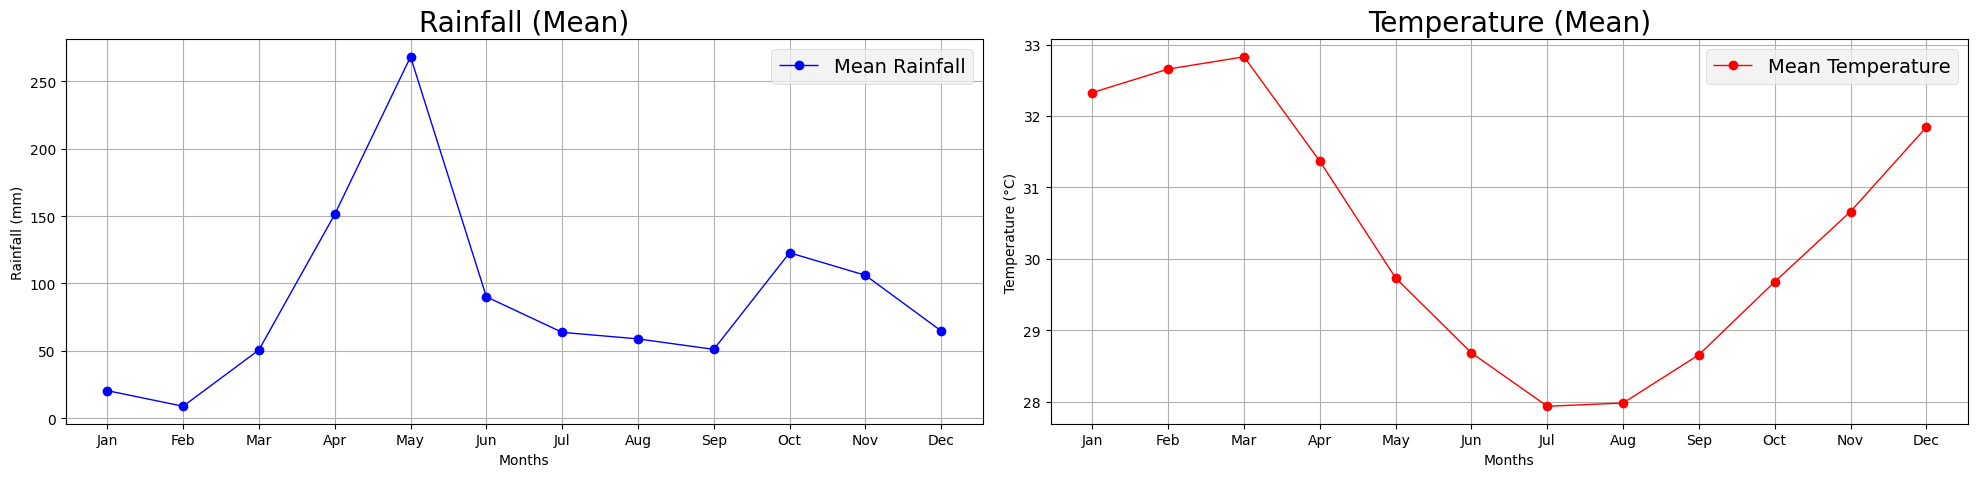

In [51]:
#plotting the mean of both rainfall and temperature  monthly
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.style.use('fivethirtyeight')

# Plotting mean rainfall

ax1.plot(monthly_avg_n, label='Mean Rainfall', color='blue', linewidth="1", marker="o")
ax1.set_title('Rainfall (Mean)')
ax1.set_xlabel('Months')
ax1.set_ylabel('Rainfall (mm)')
ax1.legend()
ax1.grid(True)

# Plotting mean temperature
ax2.plot(monthly_avg_m, label='Mean Temperature', color='red', linewidth="1", marker="o")
ax2.set_title('Temperature (Mean)')
ax2.set_xlabel('Months')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [58]:
monthly_avg_n = pd.DataFrame(monthly_avg_n)
print(type(monthly_avg_n))

<class 'pandas.core.frame.DataFrame'>


In [61]:
#Monthly minimum of precipitation
month_min_rain = monthly_avg_n.min(axis=1)
month_min_rain

Jan     20.333846
Feb      8.743590
Mar     50.584872
Apr    151.261538
May    268.279487
Jun     90.031282
Jul     63.641795
Aug     58.777179
Sep     50.987436
Oct    122.735897
Nov    106.018462
Dec     64.710256
dtype: float64

In [63]:
#monthly maximmum precipitation of rainfall
month_max_rain = monthly_avg_n.max(axis=1)
month_max_rain

Jan     20.333846
Feb      8.743590
Mar     50.584872
Apr    151.261538
May    268.279487
Jun     90.031282
Jul     63.641795
Aug     58.777179
Sep     50.987436
Oct    122.735897
Nov    106.018462
Dec     64.710256
dtype: float64

In [66]:
#transposing and setting new values to our minimum monthly values and passing new column names of months and values.
long_min = month_min_rain.T.reset_index()
long_min.columns = ['month', 'values']
long_min

,month,values
0,Jan,20.333846
1,Feb,8.743590
2,Mar,50.584872
3,Apr,151.261538
4,May,268.279487
5,Jun,90.031282
6,Jul,63.641795
7,Aug,58.777179
8,Sep,50.987436
9,Oct,122.735897


In [67]:
#transposing and setting new values to our minimum monthly values and passing new column names of months and values.
long_max = month_max_rain.T.reset_index()
long_max.columns = ['month', 'values']
long_max

,month,values
0,Jan,20.333846
1,Feb,8.743590
2,Mar,50.584872
3,Apr,151.261538
4,May,268.279487
5,Jun,90.031282
6,Jul,63.641795
7,Aug,58.777179
8,Sep,50.987436
9,Oct,122.735897


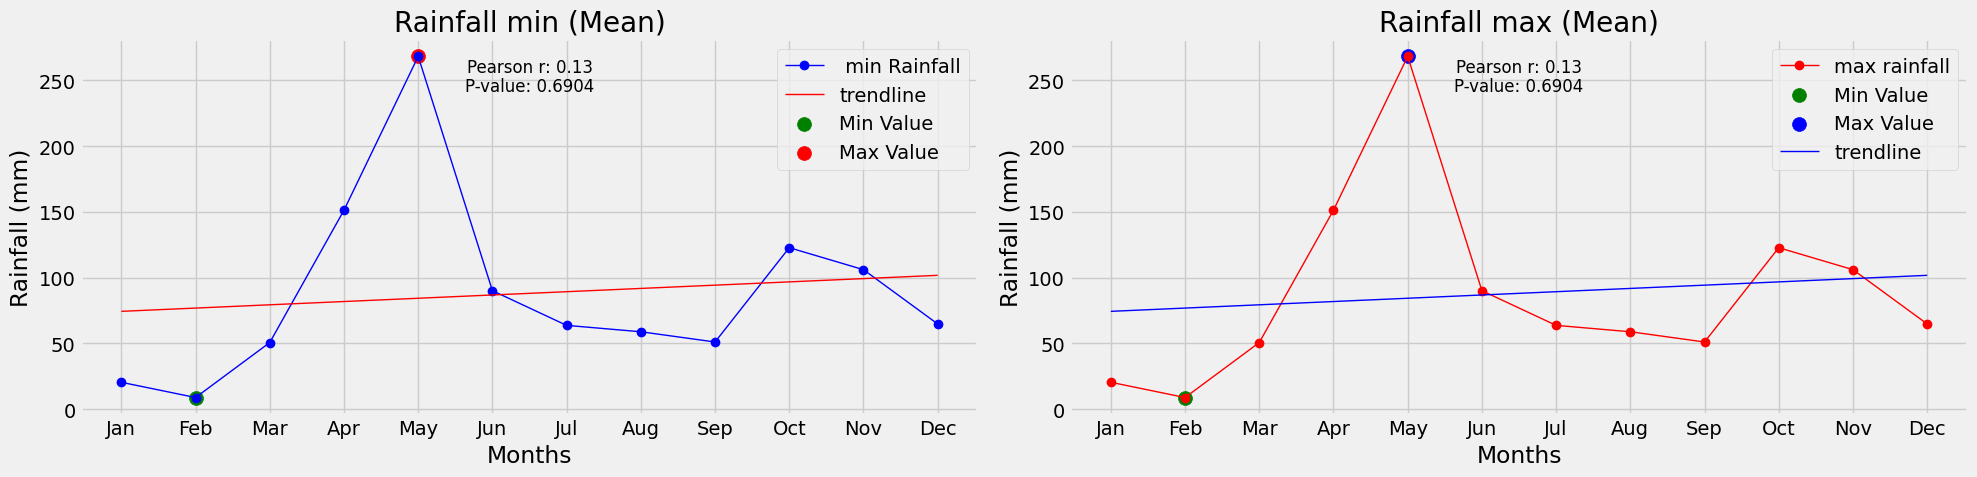

In [68]:
#the meand and maximum values of temp
ifg, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.style.use('fivethirtyeight')


# Calculate Pearson correlation for long_min
r_min, p_min = pearsonr(np.arange(len(long_min)), long_min['values'])

# Calculate Pearson correlation for long_max
r_max, p_max = pearsonr(np.arange(len(long_max)), long_max['values'])

x = np.arange(len(long_min))
y = np.arange(len(long_min))

# Plotting mean rainfall
ax1.plot(long_min['month'], long_min['values'], label=' min Rainfall', color='blue', linewidth="1", marker="o")


# Add correlation results for min
ax1.text(0.5, 0.95, f'Pearson r: {r_min:.2f}', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax1.text(0.5, 0.90, f'P-value: {p_min:.4f}', ha='center', va='top', transform=ax1.transAxes, fontsize=12)

slope, intercept = np.polyfit(x, long_min['values'], 1)
trendline = slope * x + intercept
ax1.plot(x, trendline, color='red', linewidth="1", label="trendline")

min_value = long_min['values'].min()
max_value = long_min['values'].max()
ax1.scatter(long_min['month'][long_min['values'] == min_value], [min_value], color='green', alpha=1, s=100, label='Min Value')
ax1.scatter(long_min['month'][long_min['values'] == max_value], [max_value], color='red', alpha=1, s=100, label='Max Value')


ax1.set_title('Rainfall min (Mean)')
ax1.set_xlabel('Months')
ax1.set_ylabel('Rainfall (mm)')
ax1.legend()
ax1.grid(True)
# Plotting mean temperature
ax2.plot(long_max['month'], long_max['values'], label='max rainfall', color='red', alpha=1, linewidth="1", marker="o") 


min_value_max = long_max['values'].min()
max_value_max = long_max['values'].max()
ax2.scatter(long_max['month'][long_max['values'] == min_value_max], [min_value_max], color='green', alpha=1, s=100, label='Min Value')
ax2.scatter(long_max['month'][long_max['values'] == max_value_max], [max_value_max], color='blue', alpha=1, s=100, label='Max Value')

# Add correlation results for max
ax2.text(0.5, 0.95, f'Pearson r: {r_max:.2f}', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax2.text(0.5, 0.90, f'P-value: {p_max:.4f}', ha='center', va='top', transform=ax2.transAxes, fontsize=12)

slope, intercept = np.polyfit(y, long_max['values'], 1)
trendline = slope * y + intercept
ax2.plot(y, trendline, color='blue', linewidth="1", label="trendline")

ax2.set_title('Rainfall max (Mean)')
ax2.set_xlabel('Months')
ax2.set_ylabel('Rainfall (mm)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

In [69]:
#finding the r and p values for our minimum values 
r, p = pearsonr(x, long_min['values'])
print(r)
print(p)

0.12859137947146912
0.6904187317171633


In [71]:
month_min_rain

Jan     20.333846
Feb      8.743590
Mar     50.584872
Apr    151.261538
May    268.279487
Jun     90.031282
Jul     63.641795
Aug     58.777179
Sep     50.987436
Oct    122.735897
Nov    106.018462
Dec     64.710256
dtype: float64

In [70]:
monthly_avg_m= pd.DataFrame(monthly_avg_m)
print(type(monthly_avg_m))

<class 'pandas.core.frame.DataFrame'>


In [72]:
month_min_temp = monthly_avg_m.min(axis=1)
month_max_temp = monthly_avg_m.max(axis=1)

In [73]:
long_min_temp = month_min_temp.T.reset_index()
long_min_temp.columns = ['month', 'values']
long_min_temp

,month,values
0,Jan,32.327897
1,Feb,32.657224
2,Mar,32.828471
3,Apr,31.365217
4,May,29.729762
5,Jun,28.681748
6,Jul,27.934785
7,Aug,27.979983
8,Sep,28.655419
9,Oct,29.677587


In [74]:
long_max_temp = month_max_temp.T.reset_index()
long_max_temp.columns = ['month', 'values']
long_max_temp

,month,values
0,Jan,32.327897
1,Feb,32.657224
2,Mar,32.828471
3,Apr,31.365217
4,May,29.729762
5,Jun,28.681748
6,Jul,27.934785
7,Aug,27.979983
8,Sep,28.655419
9,Oct,29.677587


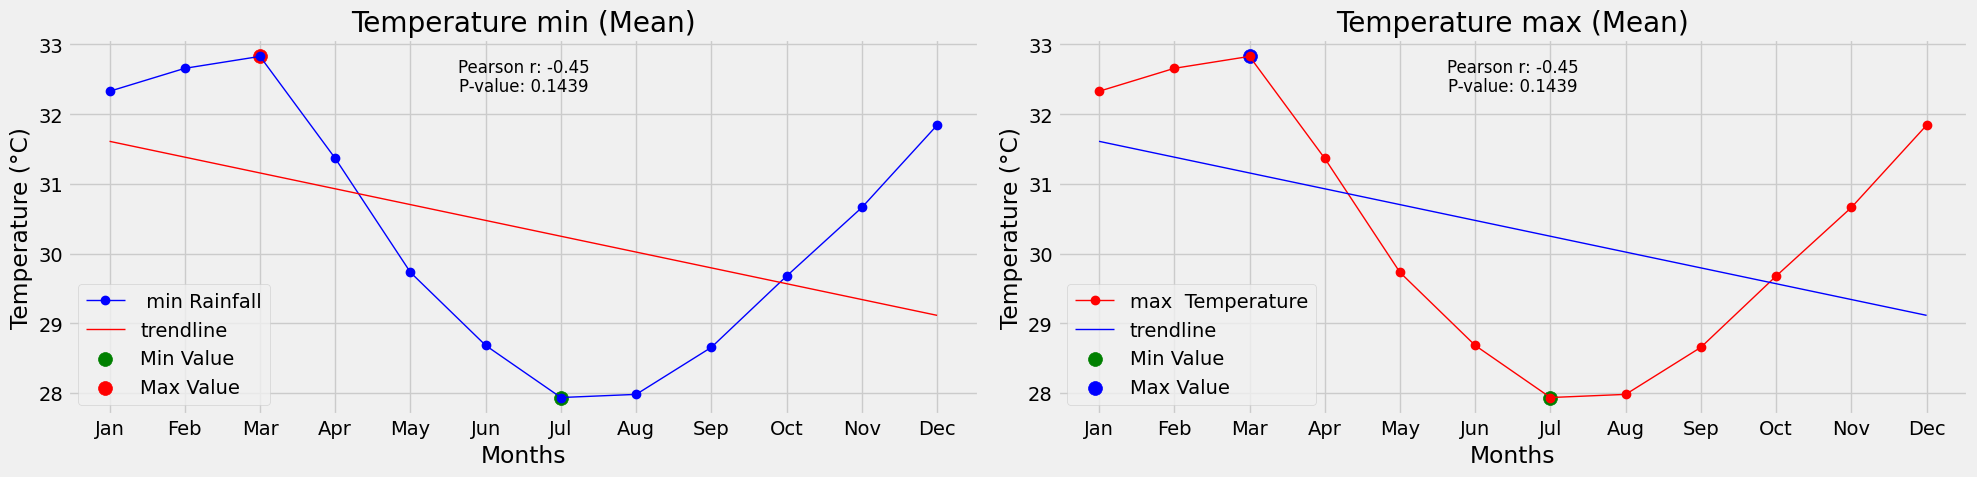

In [75]:
#the meand and maximum values of temp
ifg, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.style.use('fivethirtyeight')

# Calculate Pearson correlation for long_min
r_min, p_min = pearsonr(np.arange(len(long_min_temp)), long_min_temp['values'])

# Calculate Pearson correlation for long_max
r_max, p_max = pearsonr(np.arange(len(long_max_temp)), long_max_temp['values'])

x = np.arange(len(long_min_temp))
y = np.arange(len(long_min_temp))
# Plotting mean rainfall
ax1.plot(long_min_temp['month'], long_min_temp['values'], label=' min Rainfall', color='blue', linewidth="1", marker="o")

# Add correlation results for min
ax1.text(0.5, 0.95, f'Pearson r: {r_min:.2f}', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax1.text(0.5, 0.90, f'P-value: {p_min:.4f}', ha='center', va='top', transform=ax1.transAxes, fontsize=12)


slope, intercept = np.polyfit(x, long_min_temp['values'], 1)
trendline = slope * x + intercept
ax1.plot(x, trendline, color='red', linewidth="1", label="trendline")

min_value = long_min_temp['values'].min()
max_value = long_min_temp['values'].max()
ax1.scatter(long_min_temp['month'][long_min_temp['values'] == min_value], [min_value], color='green', alpha=1, s=100, label='Min Value')
ax1.scatter(long_min_temp['month'][long_min_temp['values'] == max_value], [max_value], color='red', alpha=1, s=100, label='Max Value')

ax1.set_title('Temperature min (Mean)')
ax1.set_xlabel('Months')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()
ax1.grid(True)

# Plotting mean temperature
ax2.plot(long_max_temp['month'], long_max_temp['values'], label='max  Temperature', color='red', linewidth="1", marker="o")

ax2.text(0.5, 0.95, f'Pearson r: {r_max:.2f}', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax2.text(0.5, 0.90, f'P-value: {p_max:.4f}', ha='center', va='top', transform=ax2.transAxes, fontsize=12)

slope, intercept = np.polyfit(x, long_max_temp['values'], 1)
trendline = slope * y + intercept
ax2.plot(y, trendline, color='blue', linewidth="1", label="trendline")


min_value_max = long_max_temp['values'].min()
max_value_max = long_max_temp['values'].max()
ax2.scatter(long_max_temp['month'][long_max_temp['values'] == min_value_max], [min_value_max], color='green', alpha=1, s=100, label='Min Value')
ax2.scatter(long_max_temp['month'][long_max_temp['values'] == max_value_max], [max_value_max], color='blue', alpha=1, s=100, label='Max Value')

ax2.set_title('Temperature max (Mean)')
ax2.set_xlabel('Months')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [76]:
precipitation = index.reset_index()
precipitation

,Year,Station ID,Station name,Element,Jan,Feb,Mar,Apr,May,Jun,...,Sep,Oct,Nov,Dec,avarage,MAM,JJAS,OND,WINTER,Annual
0,1980,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.00,26.9,23.20,238.5,78.8,23.20,...,39.40,21.5,95.90,25.7,70.066667,113.500000,82.3250,47.700000,13.95,70.066667
1,1981,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,59.60,4.8,201.90,87.6,126.3,77.90,...,27.10,166.3,101.80,124.9,95.066667,138.600000,66.9000,131.000000,32.20,95.066667
2,1982,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.60,0.0,48.20,184.9,664.8,111.20,...,149.50,199.7,85.60,55.5,139.725000,299.300000,109.1000,113.600000,0.80,139.725000
3,1983,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,15.6,14.70,81.0,594.4,110.00,...,74.20,25.8,34.90,25.2,93.183333,230.033333,81.6500,28.633333,7.80,93.183333
4,1984,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,0.0,34.00,246.6,143.8,198.70,...,18.60,184.9,146.90,64.6,95.008333,141.466667,79.8250,132.133333,0.00,95.008333
5,1985,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,15.80,54.2,7.70,137.0,169.1,52.10,...,37.00,16.9,58.40,185.7,72.016667,104.600000,54.8500,87.000000,35.00,72.016667
6,1986,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,6.70,0.6,22.00,324.5,372.2,36.20,...,25.00,40.2,49.40,124.3,90.666667,239.566667,37.0250,71.300000,3.65,90.666667
7,1987,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,16.80,0.0,0.00,114.6,353.1,27.30,...,40.30,25.9,26.70,12.6,72.666667,155.900000,80.5750,21.733333,8.40,72.666667
8,1988,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,9.80,2.9,66.70,313.6,54.8,178.10,...,47.50,26.0,108.80,87.9,82.783333,145.033333,80.7250,74.233333,6.35,82.783333
9,1989,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,19.70,0.3,88.40,141.2,178.8,56.40,...,38.00,149.0,144.50,90.2,86.416667,136.133333,56.2250,127.900000,10.00,86.416667


In [77]:
print(type(precipitation))

<class 'pandas.core.frame.DataFrame'>


In [78]:
new_dt = precipitation[['Year', 'Annual']]
new_dt

,Year,Annual
0,1980,70.066667
1,1981,95.066667
2,1982,139.725000
3,1983,93.183333
4,1984,95.008333
5,1985,72.016667
6,1986,90.666667
7,1987,72.666667
8,1988,82.783333
9,1989,86.416667


In [79]:
temperature = index_temp.reset_index()
temperature

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,MEAN,MAM,JJAS,OND,WINTER,Annual
0,1980,32.300000,32.300000,32.400000,32.000000,29.700000,28.800000,28.100000,27.200000,28.100000,29.800000,30.500000,31.900000,30.258333,31.366667,28.050000,30.733333,32.300000,30.258333
1,1981,32.300000,32.000000,31.600000,30.900000,29.300000,28.100000,27.400000,28.000000,28.300000,29.000000,29.300000,30.800000,29.750000,30.600000,27.950000,29.700000,32.150000,29.750000
2,1982,31.900000,32.600000,32.700000,30.400000,28.000000,28.300000,27.600000,27.800000,28.400000,29.000000,31.800000,31.900000,30.033333,30.366667,28.025000,30.900000,32.250000,30.033333
3,1983,31.500000,32.400000,33.000000,31.700000,29.700000,28.800000,28.200000,28.200000,28.200000,29.100000,30.900000,32.100000,30.316667,31.466667,28.350000,30.700000,31.950000,30.316667
4,1984,32.100000,32.200000,32.500000,31.400000,30.500000,28.000000,27.000000,27.000000,28.100000,28.600000,29.800000,31.400000,29.883333,31.466667,27.525000,29.933333,32.150000,29.883333
5,1985,31.300000,31.800000,32.000000,31.300000,28.900000,28.200000,27.300000,27.800000,28.400000,29.200000,30.500000,30.500000,29.766667,30.733333,27.925000,30.066667,31.550000,29.766667
6,1986,31.400000,32.200000,32.700000,30.400000,29.000000,28.500000,27.600000,27.700000,28.300000,30.000000,31.200000,31.800000,30.066667,30.700000,28.025000,31.000000,31.800000,30.066667
7,1987,31.800000,32.600000,32.600000,32.400000,29.800000,28.500000,27.100000,27.600000,28.600000,30.000000,31.200000,32.400000,30.383333,31.600000,27.950000,31.200000,32.200000,30.383333
8,1988,33.300000,33.600000,33.400000,30.600000,29.800000,28.100000,27.800000,28.200000,28.100000,29.900000,30.500000,30.900000,30.350000,31.266667,28.050000,30.433333,33.450000,30.350000
9,1989,31.100000,32.300000,32.100000,30.500000,29.300000,28.200000,27.600000,26.900000,28.300000,29.200000,30.200000,31.200000,29.741667,30.633333,27.750000,30.200000,31.700000,29.741667


In [80]:
temp_dt = temperature[['Year', "Annual"]]
temp_dt

,Year,Annual
0,1980,30.258333
1,1981,29.750000
2,1982,30.033333
3,1983,30.316667
4,1984,29.883333
5,1985,29.766667
6,1986,30.066667
7,1987,30.383333
8,1988,30.350000
9,1989,29.741667


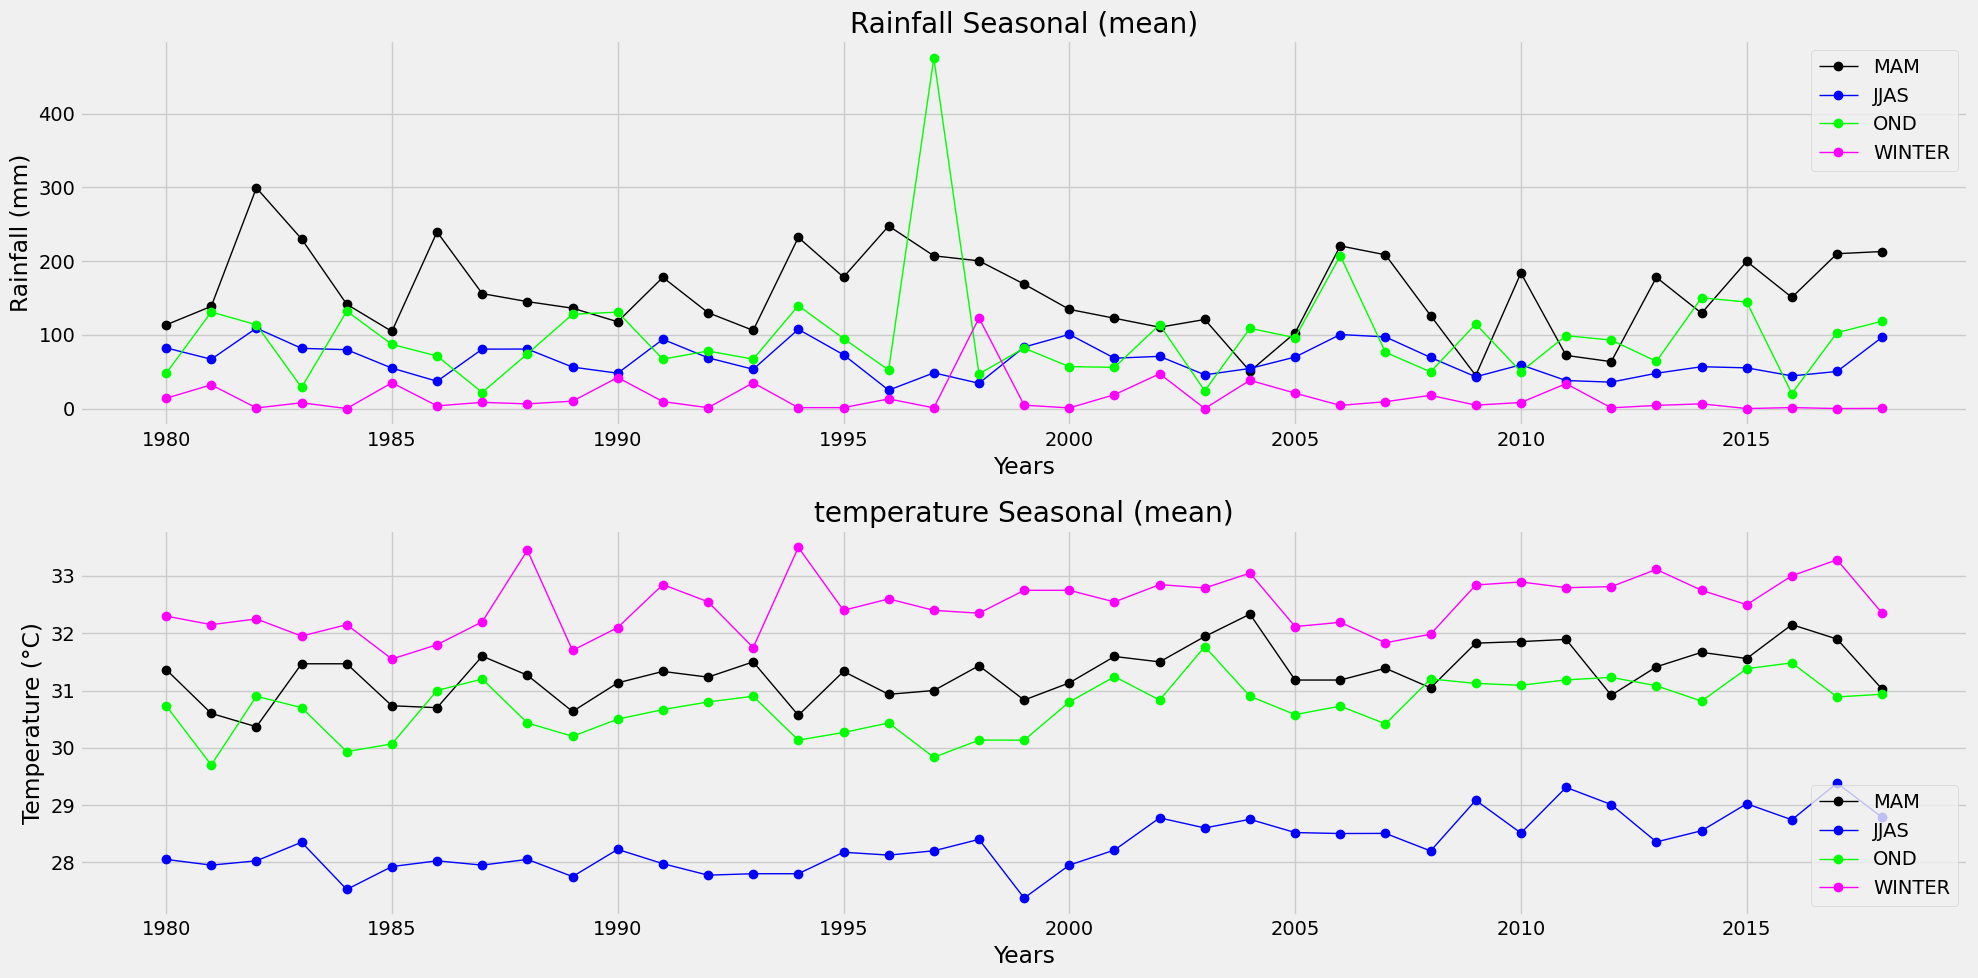

In [92]:
#plotting our seasonal values for rainfall and temperature.
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# Plotting seasonal temperature
ax1.plot(precipitation['Year'], precipitation['MAM'],label="MAM", color='#000000', linewidth="1", marker="o")
ax1.plot(precipitation['Year'], precipitation['JJAS'],label="JJAS", color='#0000FF', linewidth="1", marker="o")
ax1.plot(precipitation['Year'], precipitation['OND'],label="OND", color='#00FF00', linewidth="1", marker="o")
ax1.plot(precipitation['Year'], precipitation['WINTER'],label="WINTER", color='#FF00FF', linewidth="1", marker="o")
ax1.set_title('Rainfall Seasonal (mean)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Rainfall (mm)')
ax1.legend()
ax1.grid(True)

# Plotting mean rainfall
ax2.plot(temperature['Year'], temperature['MAM'], label='MAM', color='#000000', linewidth="1", marker="o")
ax2.plot(temperature['Year'], temperature['JJAS'], label='JJAS', color='#0000FF', linewidth="1", marker="o")
ax2.plot(temperature['Year'], temperature['OND'], label='OND', color='#00FF00', linewidth="1", marker="o")
ax2.plot(temperature['Year'], temperature['WINTER'], label='WINTER', color='#FF00FF', linewidth="1", marker="o")
ax2.set_title('temperature Seasonal (mean)')
ax2.set_xlabel('Years')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


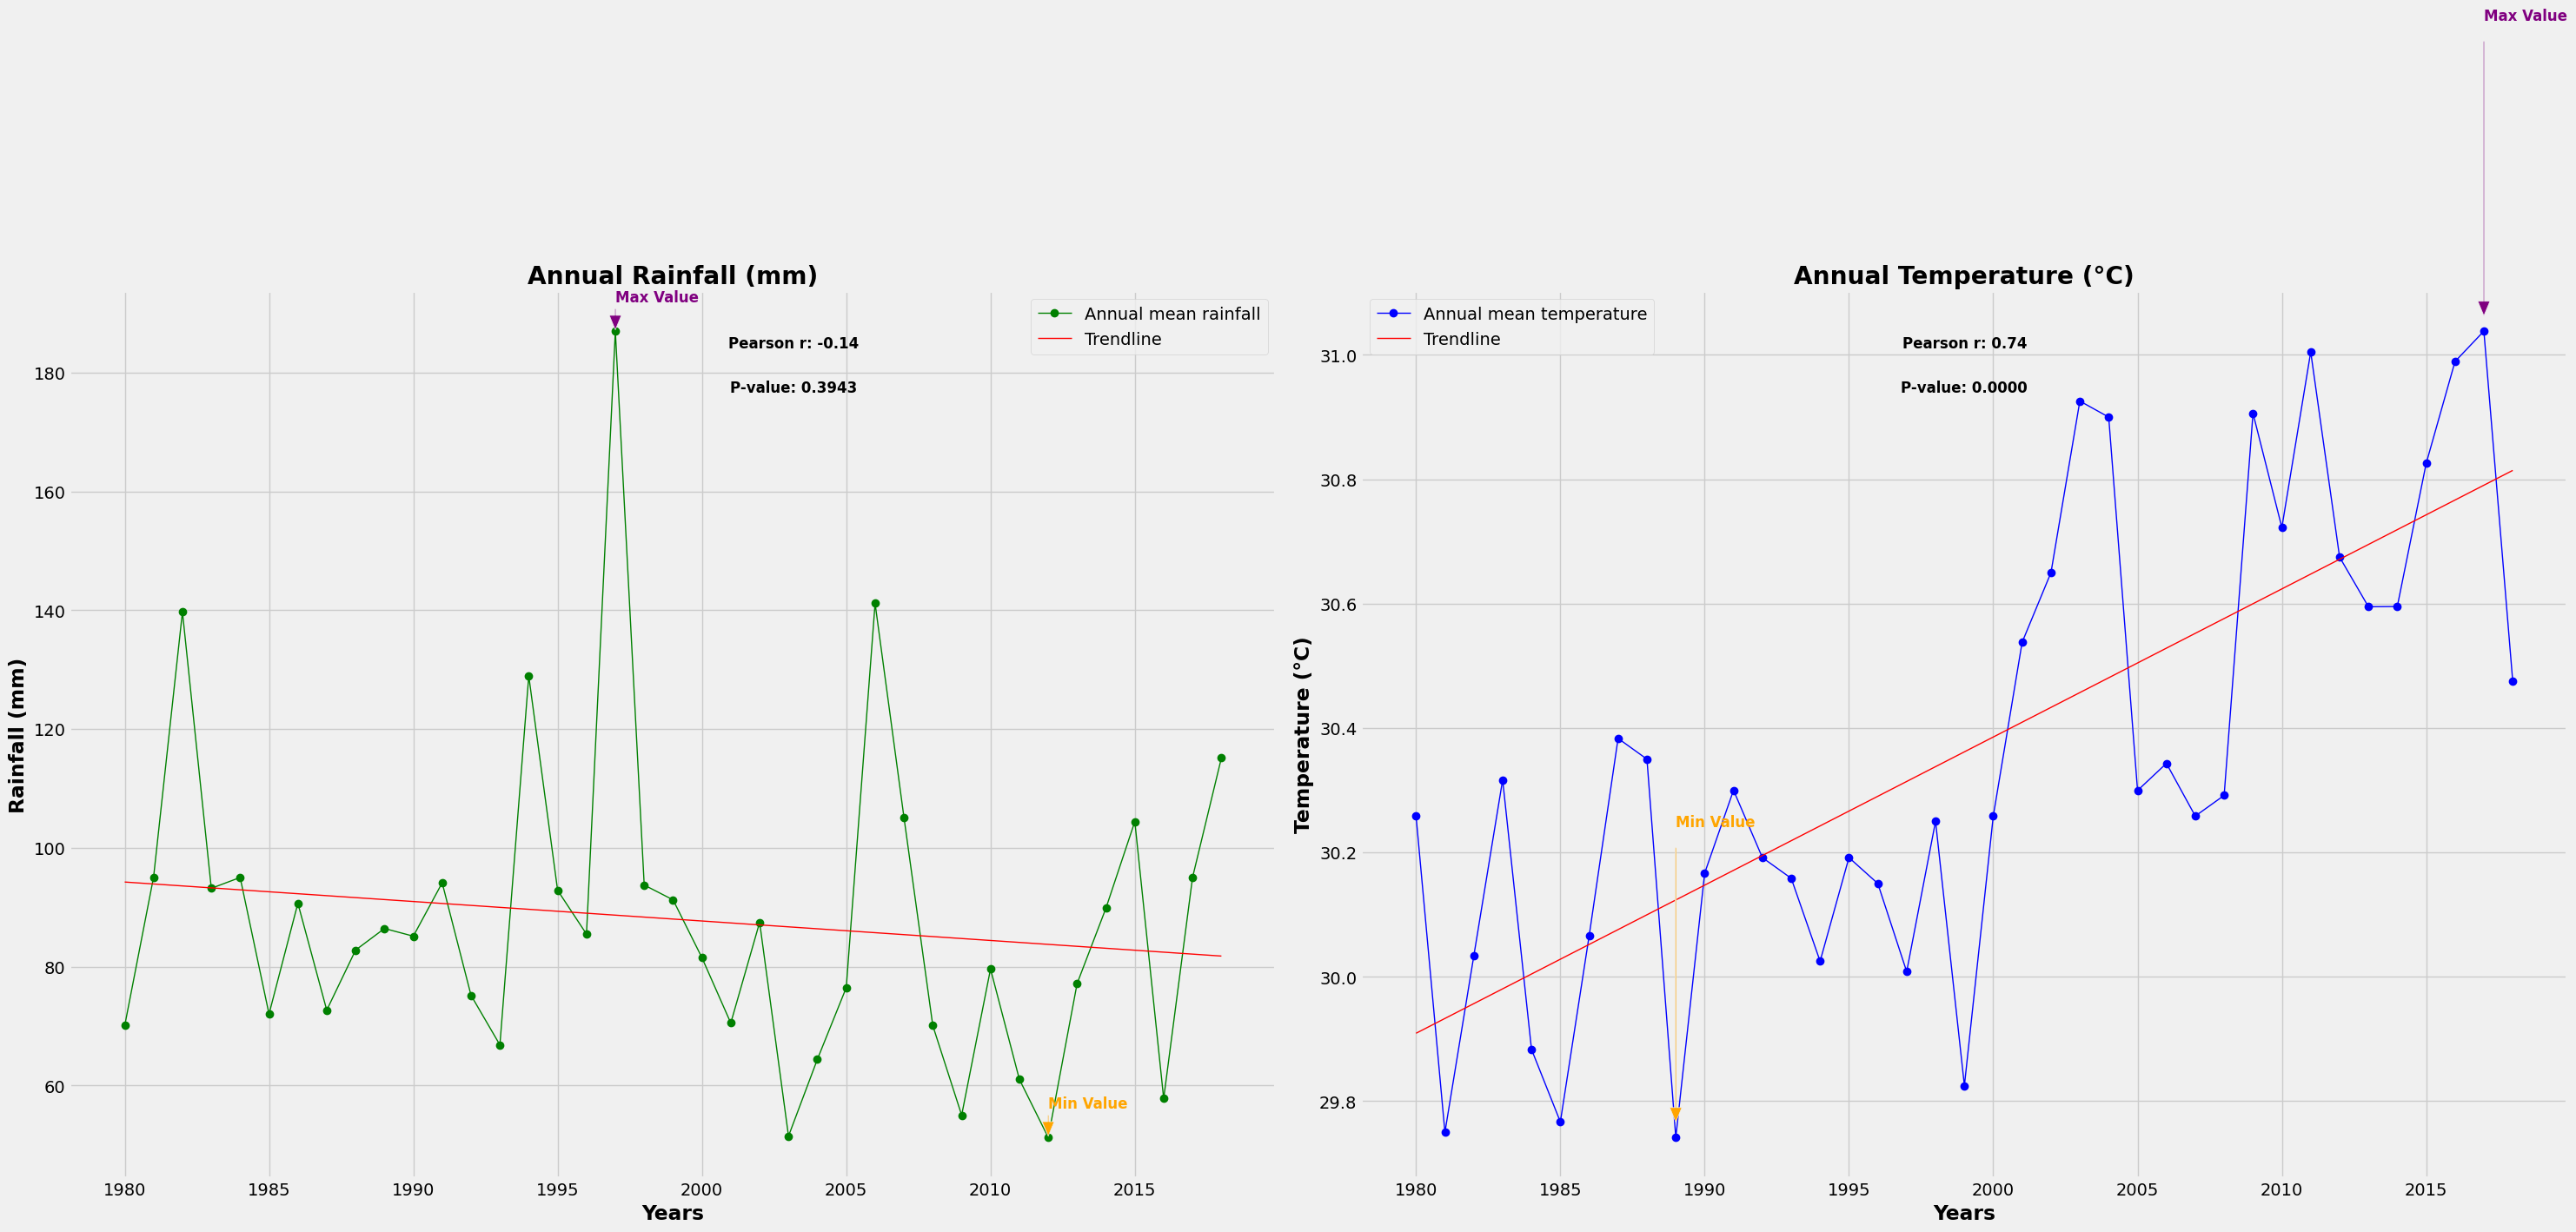

In [95]:
plt.style.use('fivethirtyeight')
fig, (rain, temp) = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

# Plotting annual rainfall
rain.plot(new_dt['Year'], new_dt['Annual'], linewidth=1, color="green", marker="o", label="Annual mean rainfall") 

# Calculate Pearson correlation for rainfall
r_r, p_r = pearsonr(np.arange(len(new_dt)), new_dt['Annual'])
rain.text(0.6, 0.95, f'Pearson r: {r_r:.2f}', ha='center', va='top', transform=rain.transAxes, fontweight="bold", fontsize=12)
rain.text(0.6, 0.90, f'P-value: {p_r:.4f}', ha='center', va='top', transform=rain.transAxes, fontweight="bold", fontsize=12)

# Trendline for rainfall
slope, intercept = np.polyfit(new_dt['Year'], new_dt['Annual'], 1)
trendline = slope * new_dt['Year'] + intercept
rain.plot(new_dt['Year'], trendline, color='red', linewidth=1, label="Trendline")

# Highlight min and max values for rainfall
min_value = new_dt['Annual'].min()
max_value = new_dt['Annual'].max()
min_year = new_dt['Year'][new_dt['Annual'] == min_value].values[0]
max_year = new_dt['Year'][new_dt['Annual'] == max_value].values[0]

rain.annotate('Min Value', xy=(min_year, min_value), xytext=(min_year, min_value + 5),
              arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=10),
              fontsize=12, color='orange', fontweight='bold')
rain.annotate('Max Value', xy=(max_year, max_value), xytext=(max_year, max_value + 5),
              arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=10),
              fontsize=12, color='purple', fontweight='bold')

rain.set_title('Annual Rainfall (mm)', fontweight='bold')
rain.set_xlabel('Years', fontweight='bold')
rain.set_ylabel('Rainfall (mm)', fontweight='bold')
rain.legend()
rain.grid(True)

# Plotting annual temperature
temp.plot(temp_dt['Year'], temp_dt['Annual'], linewidth=1, color="blue", marker="o", label="Annual mean temperature")

# Calculate Pearson correlation for temperature
r_t, p_t = pearsonr(np.arange(len(temp_dt)), temp_dt['Annual'])
temp.text(0.5, 0.95, f'Pearson r: {r_t:.2f}', ha='center', va='top', transform=temp.transAxes, fontweight="bold", fontsize=12)
temp.text(0.5, 0.90, f'P-value: {p_t:.4f}', ha='center', va='top', transform=temp.transAxes, fontweight="bold", fontsize=12)

# Trendline for temperature
slope_temp, intercept_temp = np.polyfit(temp_dt['Year'], temp_dt['Annual'], 1)
trendline_temp = slope_temp * temp_dt['Year'] + intercept_temp
temp.plot(temp_dt['Year'], trendline_temp, color='red', linewidth=1, label="Trendline")

# Highlight min and max values for temperature
min_value_temp = temp_dt['Annual'].min()
max_value_temp = temp_dt['Annual'].max()
min_year_temp = temp_dt['Year'][temp_dt['Annual'] == min_value_temp].values[0]
max_year_temp = temp_dt['Year'][temp_dt['Annual'] == max_value_temp].values[0]

temp.annotate('Min Value', xy=(min_year_temp, min_value_temp), xytext=(min_year_temp, min_value_temp + 0.5),
               arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=10),
               fontsize=12, color='orange', fontweight='bold')
temp.annotate('Max Value', xy=(max_year_temp, max_value_temp), xytext=(max_year_temp, max_value_temp + 0.5),
               arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=10),
               fontsize=12, color='purple', fontweight='bold')

temp.set_title('Annual Temperature (°C)', fontweight='bold')
temp.set_xlabel('Years', fontweight='bold')
temp.set_ylabel('Temperature (°C)', fontweight='bold')
temp.grid(True)

plt.tight_layout()
plt.legend()
plt.savefig('annual_rainfall_temperature_plot.png')  # Save the figure as an image
plt.show()


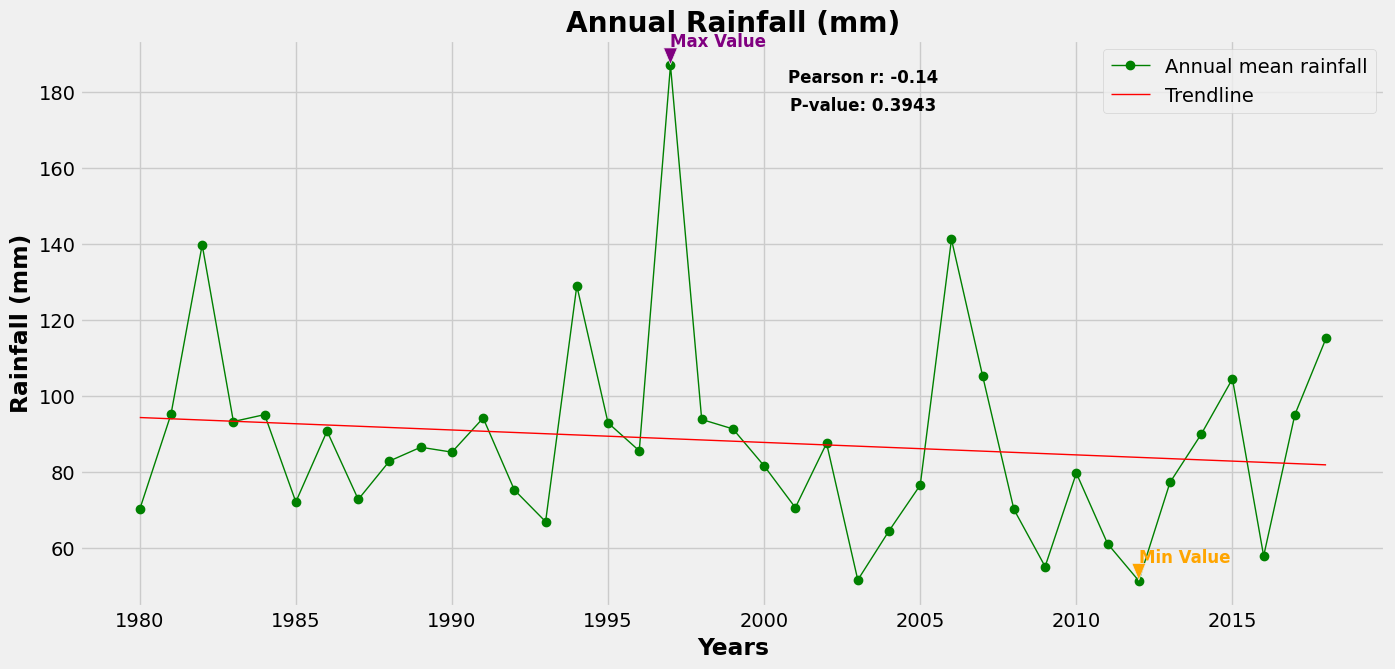

In [96]:
plt.style.use('fivethirtyeight')
fig, rain = plt.subplots(figsize=(15, 7))

# Plotting annual rainfall
rain.plot(new_dt['Year'], new_dt['Annual'], linewidth=1, color="green", marker="o", label="Annual mean rainfall") 

# Calculate Pearson correlation for rainfall
r_r, p_r = pearsonr(np.arange(len(new_dt)), new_dt['Annual'])
rain.text(0.6, 0.95, f'Pearson r: {r_r:.2f}', ha='center', va='top', transform=rain.transAxes, fontweight="bold", fontsize=12)
rain.text(0.6, 0.90, f'P-value: {p_r:.4f}', ha='center', va='top', transform=rain.transAxes, fontweight="bold", fontsize=12)

# Trendline for rainfall
slope, intercept = np.polyfit(new_dt['Year'], new_dt['Annual'], 1)
trendline = slope * new_dt['Year'] + intercept
rain.plot(new_dt['Year'], trendline, color='red', linewidth=1, label="Trendline")

# Highlight min and max values for rainfall
min_value = new_dt['Annual'].min()
max_value = new_dt['Annual'].max()
min_year = new_dt['Year'][new_dt['Annual'] == min_value].values[0]
max_year = new_dt['Year'][new_dt['Annual'] == max_value].values[0]

rain.annotate('Min Value', xy=(min_year, min_value), xytext=(min_year, min_value + 5),
              arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=10),
              fontsize=12, color='orange', fontweight='bold')
rain.annotate('Max Value', xy=(max_year, max_value), xytext=(max_year, max_value + 5),
              arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=10),
              fontsize=12, color='purple', fontweight='bold')

rain.set_title('Annual Rainfall (mm)', fontweight='bold')
rain.set_xlabel('Years', fontweight='bold')
rain.set_ylabel('Rainfall (mm)', fontweight='bold')
rain.legend()
rain.grid(True)

plt.savefig('annual_rainfall_plot.png')  # Save the figure as an image
plt.show()


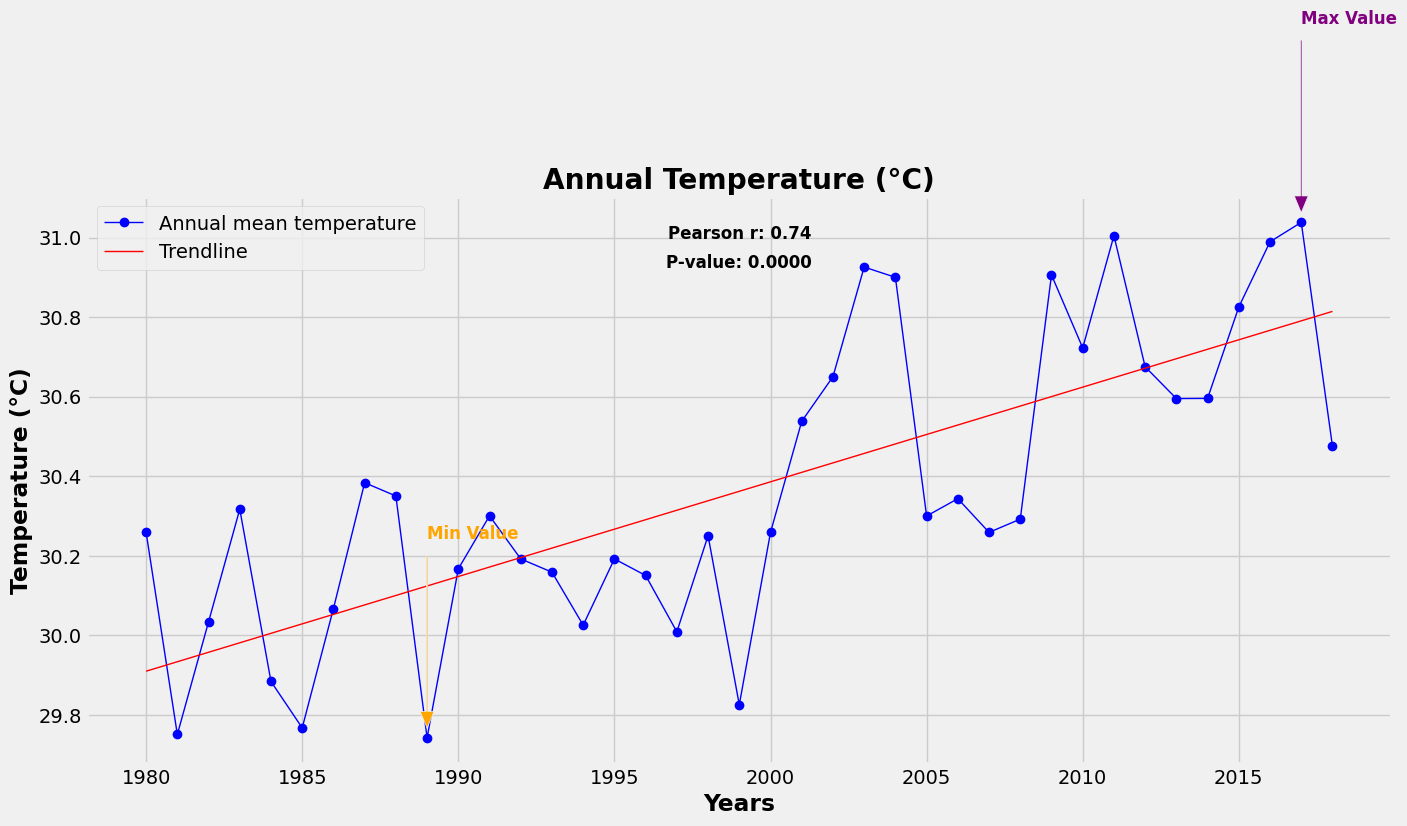

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.style.use('fivethirtyeight')
fig, temp = plt.subplots(figsize=(15, 7))

# Plotting annual temperature
temp.plot(temp_dt['Year'], temp_dt['Annual'], linewidth=1, color="blue", marker="o", label="Annual mean temperature")

# Calculate Pearson correlation for temperature
r_t, p_t = pearsonr(np.arange(len(temp_dt)), temp_dt['Annual'])
temp.text(0.5, 0.95, f'Pearson r: {r_t:.2f}', ha='center', va='top', transform=temp.transAxes, fontweight="bold", fontsize=12)
temp.text(0.5, 0.90, f'P-value: {p_t:.4f}', ha='center', va='top', transform=temp.transAxes, fontweight="bold", fontsize=12)

# Trendline for temperature
slope_temp, intercept_temp = np.polyfit(temp_dt['Year'], temp_dt['Annual'], 1)
trendline_temp = slope_temp * temp_dt['Year'] + intercept_temp
temp.plot(temp_dt['Year'], trendline_temp, color='red', linewidth=1, label="Trendline")

# Highlight min and max values for temperature
min_value_temp = temp_dt['Annual'].min()
max_value_temp = temp_dt['Annual'].max()
min_year_temp = temp_dt['Year'][temp_dt['Annual'] == min_value_temp].values[0]
max_year_temp = temp_dt['Year'][temp_dt['Annual'] == max_value_temp].values[0]

temp.annotate('Min Value', xy=(min_year_temp, min_value_temp), xytext=(min_year_temp, min_value_temp + 0.5),
               arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=10),
               fontsize=12, color='orange', fontweight='bold')
temp.annotate('Max Value', xy=(max_year_temp, max_value_temp), xytext=(max_year_temp, max_value_temp + 0.5),
               arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=10),
               fontsize=12, color='purple', fontweight='bold')

temp.set_title('Annual Temperature (°C)', fontweight='bold')
temp.set_xlabel('Years', fontweight='bold')
temp.set_ylabel('Temperature (°C)', fontweight='bold')
temp.grid(True)
temp.legend()

plt.savefig('annual_temperature_plot.png')  # Save the figure as an image
plt.show()


In [99]:
index

,Station ID,Station name,Element,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Sep,Oct,Nov,Dec,avarage,MAM,JJAS,OND,WINTER,Annual
Year,,,,,,,,,,,,,,,,,,,,,
1980,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.00,26.9,23.20,238.5,78.8,23.20,53.90,...,39.40,21.5,95.90,25.7,70.066667,113.500000,82.3250,47.700000,13.95,70.066667
1981,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,59.60,4.8,201.90,87.6,126.3,77.90,32.20,...,27.10,166.3,101.80,124.9,95.066667,138.600000,66.9000,131.000000,32.20,95.066667
1982,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,1.60,0.0,48.20,184.9,664.8,111.20,140.80,...,149.50,199.7,85.60,55.5,139.725000,299.300000,109.1000,113.600000,0.80,139.725000
1983,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,15.6,14.70,81.0,594.4,110.00,104.80,...,74.20,25.8,34.90,25.2,93.183333,230.033333,81.6500,28.633333,7.80,93.183333
1984,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,0.00,0.0,34.00,246.6,143.8,198.70,77.30,...,18.60,184.9,146.90,64.6,95.008333,141.466667,79.8250,132.133333,0.00,95.008333
1985,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,15.80,54.2,7.70,137.0,169.1,52.10,108.10,...,37.00,16.9,58.40,185.7,72.016667,104.600000,54.8500,87.000000,35.00,72.016667
1986,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,6.70,0.6,22.00,324.5,372.2,36.20,20.20,...,25.00,40.2,49.40,124.3,90.666667,239.566667,37.0250,71.300000,3.65,90.666667
1987,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,16.80,0.0,0.00,114.6,353.1,27.30,88.50,...,40.30,25.9,26.70,12.6,72.666667,155.900000,80.5750,21.733333,8.40,72.666667
1988,9439021,MOI INTERNATIONAL AIRPORT - MOMBASA,Precipitation; monthly total,9.80,2.9,66.70,313.6,54.8,178.10,52.20,...,47.50,26.0,108.80,87.9,82.783333,145.033333,80.7250,74.233333,6.35,82.783333


In [102]:
#finding the contribution to annual rainfall(%), starndard deviation and coefficient variation(%) of our rainfall data

seasons = ['Annual', 'MAM', 'JJAS', 'OND', 'WINTER']

results = {}

for season in seasons:
    mean_rainfall = index[season].mean()
    total_rainfall = index[season].sum()
    annual_total = index[seasons].sum(axis=1).sum()
    
    contribution = (total_rainfall / annual_total) * 100
    std_dev = index[season].std()
    cv = (std_dev / mean_rainfall) * 100 if mean_rainfall else 0

    results[season] = {
        'Mean Rainfall (mm)': mean_rainfall,
        'Contribution to Annual Rainfall (%)': contribution,
        'Standard Deviation (mm)': std_dev,
        'Coefficient of Variation (%)': cv
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

#saving the output to an exteral cv file.
final_results_df = results_df.reset_index()
final_results_df.rename(columns={'index': 'Season'}, inplace=True)

# Filter for specific rows
filtered_results = final_results_df.loc[final_results_df['Season'].isin(['Annual', 'MAM', 'JJAS', 'OND', 'WINTER'])]

# Save to CSV
filtered_results.to_csv('rainfall_statistics.csv', index=False)

print("Results saved to 'rainfall_statistics.csv'")

        Mean Rainfall (mm)  Contribution to Annual Rainfall (%)  \
Annual           88.008803                            20.808957   
MAM             156.708632                            37.052466   
JJAS             65.859423                            15.571919   
OND              97.821538                            23.129098   
WINTER           14.538718                             3.437560   

        Standard Deviation (mm)  Coefficient of Variation (%)  
Annual                26.660326                     30.292795  
MAM                   57.967772                     36.990797  
JJAS                  22.246500                     33.778765  
OND                   74.306155                     75.960935  
WINTER                22.398838                    154.063367  
Results saved to 'rainfall_statistics.csv'


In [104]:
#finding the mankenal coefficients of our rainfall data
import pymannkendall as mk
results = {}
for column in index[['WINTER', 'MAM', 'JJAS', 'OND', 'Annual']]:
    result = mk.original_test(index[column])
    results[column] = {
        "Trend": result.trend,
        "p-value": result.p,
        "z statistic": result.z,
        "Tau": result.Tau,
        "s": result.s,
        "Variance of s": result.var_s,
        "Slope": result.slope,
        "Intercept": result.intercept,
    }

# Display results
for column, result in results.items():
    print(f"{column}:")
    for key, value in result.items():
        print(f"  {key}: {value}")

WINTER:
  Trend: no trend
  p-value: 0.1532550935546393
  z statistic: -1.4281277429396158
  Tau: -0.16059379217273953
  s: -119.0
  Variance of s: 6827.0
  Slope: -0.12307692307692308
  Intercept: 8.73846153846154
MAM:
  Trend: no trend
  p-value: 0.5293245899568817
  z statistic: -0.629037371877673
  Tau: -0.07152496626180836
  s: -53.0
  Variance of s: 6833.666666666667
  Slope: -0.6166666666666671
  Intercept: 156.75
JJAS:
  Trend: no trend
  p-value: 0.07339972979721177
  z statistic: -1.790337135344146
  Tau: -0.20107962213225372
  s: -149.0
  Variance of s: 6833.666666666667
  Slope: -0.5945312500000004
  Intercept: 78.19609375000002
OND:
  Trend: no trend
  p-value: 0.6457450970456375
  z statistic: 0.45968115637214557
  Tau: 0.05263157894736842
  s: 39.0
  Variance of s: 6833.666666666667
  Slope: 0.37777777777777527
  Intercept: 79.82222222222227
Annual:
  Trend: no trend
  p-value: 0.2657461083422321
  z statistic: -1.1129122733220367
  Tau: -0.12550607287449392
  s: -93.0
 

In [106]:
result = mk.original_test(index['MAM'])

# Extract the slope
slope = result.slope

# Interpret the slope
print(f"The rainfall trend is decreasing by {slope:.2f} mm per year.")

The rainfall trend is decreasing by -0.62 mm per year.


In [107]:
result = mk.original_test(index['MAM'])

# Extract the slope
slope = result.slope

# Interpret the slope
if slope < 0:
    print(f"The rainfall trend is decreasing by {abs(slope):.2f} mm per year.")
else:
    print(f"The rainfall trend is increasing by {slope:.2f} mm per year.")

The rainfall trend is decreasing by 0.62 mm per year.


In [108]:
#finding the mankendal coefficient of our temperature data
results = {}
for column in index_temp[['WINTER', 'MAM', 'JJAS', 'OND', 'Annual']]:
    result = mk.original_test(index_temp[column])
    results[column] = {
        "Trend": result.trend,
        "p-value": result.p,
        "z statistic": result.z,
        "Tau": result.Tau,
        "s": result.s,
        "Variance of s": result.var_s,
        "Slope": result.slope,
        "Intercept": result.intercept,
    }

# Display results
for column, result in results.items():
    print(f"{column}:")
    for key, value in result.items():
        print(f"  {key}: {value}")

WINTER:
  Trend: increasing
  p-value: 0.0041343047351425355
  z statistic: 2.867728247262354
  Tau: 0.32118758434547906
  s: 238.0
  Variance of s: 6830.0
  Slope: 0.021327519970730405
  Intercept: 32.09385546156995
MAM:
  Trend: increasing
  p-value: 0.00413064823413789
  z statistic: 2.868008203161616
  Tau: 0.32118758434547906
  s: 238.0
  Variance of s: 6828.666666666667
  Slope: 0.02140280354566063
  Intercept: 30.92668006596578
JJAS:
  Trend: increasing
  p-value: 7.006985720536818e-07
  z statistic: 4.961169931249026
  Tau: 0.5546558704453441
  s: 411.0
  Variance of s: 6829.666666666667
  Slope: 0.02819555841773498
  Intercept: 27.67764645902855
OND:
  Trend: increasing
  p-value: 0.0009537830979167161
  z statistic: 3.3038162946754612
  Tau: 0.3697705802968961
  s: 274.0
  Variance of s: 6828.0
  Slope: 0.024554531490015487
  Intercept: 30.333463901689708
Annual:
  Trend: increasing
  p-value: 4.04132522446865e-06
  z statistic: 4.609245694025168
  Tau: 0.5155195681511471
  s

In [109]:


# Perform Mann-Kendall test on temperature data
result = mk.original_test(index_temp['Annual'])

# Extract the slope
slope = result.slope

# Interpret the slope
print(f"The temperature trend is increasing by {slope:.2f} degrees Celsius per year.")

The temperature trend is increasing by 0.02 degrees Celsius per year.


In [110]:
result = mk.original_test(index_temp['Annual'])

# Extract the slope
slope = result.slope

# Interpret the slope
if slope < 0:
    print(f"The rainfall trend is decreasing by {abs(slope):.2f} mm per year.")
else:
    print(f"The rainfall trend is increasing by {slope:.2f} mm per year.")

The rainfall trend is increasing by 0.02 mm per year.


In [111]:
seasons = ['Annual', 'MAM', 'JJAS', 'OND', 'WINTER',]

results = {}

for season in seasons:
    mean_rainfall = index_temp[season].mean()
    total_rainfall = index_temp[season].sum()
    annual_total = index_temp[seasons].sum(axis=1).sum()
    
    contribution = (total_rainfall / annual_total) * 100
    std_dev = index[season].std()
    cv = (std_dev / mean_rainfall) * 100 if mean_rainfall else 0

    results[season] = {
        'Mean temperature': mean_rainfall,
        'Contribution to Annual Rainfall (%)': contribution,
        'Standard Deviation (mm)': std_dev,
        'Coefficient of Variation (%)': cv
    }

# Convert results to a DataFrame for better visualization
results_temp = pd.DataFrame(results).T
print(results_temp)


#saving the output to an exteral cv file.
final_results_temp = results_temp.reset_index()
final_results_temp.rename(columns={'index': 'Season'}, inplace=True)

# Filter for specific rows
filtered_results_temp = final_results_temp.loc[final_results_temp['Season'].isin(['Annual', 'MAM', 'JJAS', 'OND', 'WINTER'])]

# Save to CSV
filtered_results_temp.to_csv('rainfall_statistics.csv', index=False)

print("Results saved to 'rainfall_statistics.csv'")

        Mean temperature  Contribution to Annual Rainfall (%)  \
Annual         30.361749                            19.818123   
MAM            31.307817                            20.435653   
JJAS           28.312984                            18.480826   
OND            30.726827                            20.056422   
WINTER         32.492561                            21.208975   

        Standard Deviation (mm)  Coefficient of Variation (%)  
Annual                26.660326                     87.808928  
MAM                   57.967772                    185.154310  
JJAS                  22.246500                     78.573491  
OND                   74.306155                    241.828274  
WINTER                22.398838                     68.935282  
Results saved to 'rainfall_statistics.csv'
